In [56]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
import numpy as np
X, y = make_classification(n_samples=10000, n_features=10, n_classes=2, n_informative=5)
df_X=pd.DataFrame(X)
y_vals=np.array(y)
Xtrain = X[:9900]
Xtest = X[9900:]
ytrain = y[:9900]
ytest = y[9900:]

clf = LogisticRegression()
clf.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

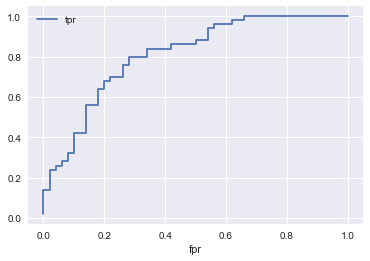

In [65]:
from sklearn import metrics
import pandas as pd
%matplotlib inline
preds = clf.predict_proba(Xtest)[:,1]
fpr, tpr, _ = metrics.roc_curve(ytest, preds)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
df_X=pd.DataFrame(X)
df_X['score']=clf.predict_proba(df_X)[:,1]
df_X['outcome']=y_vals

df.plot(x='fpr',y='tpr')


0.0


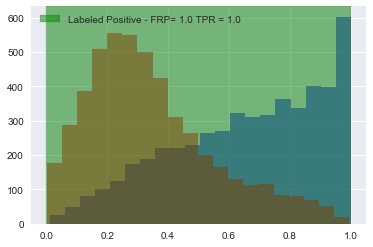

0.1


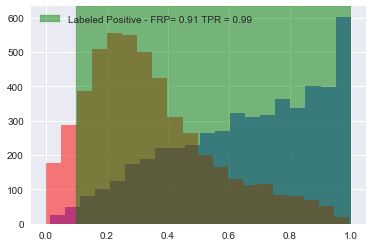

0.2


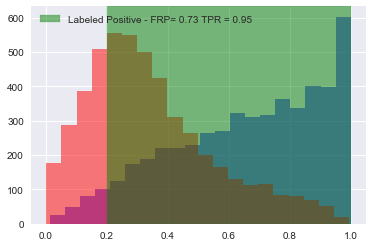

0.3


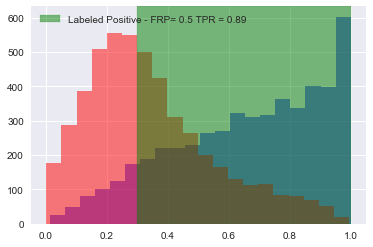

0.4


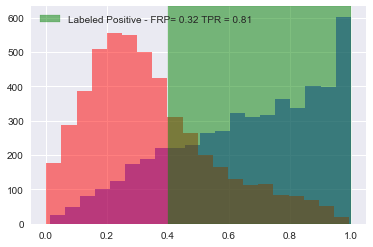

0.5


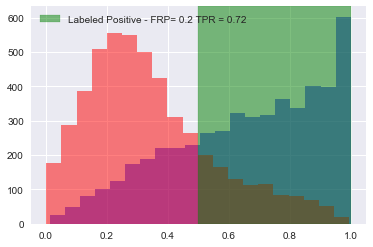

0.6


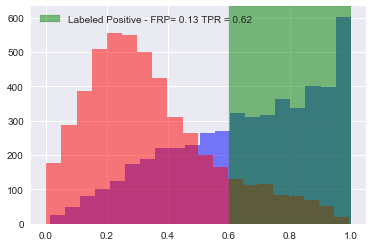

0.7


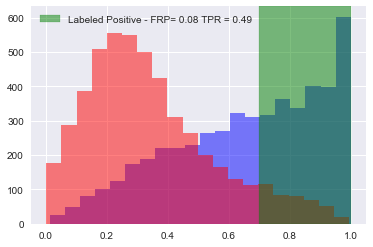

0.8


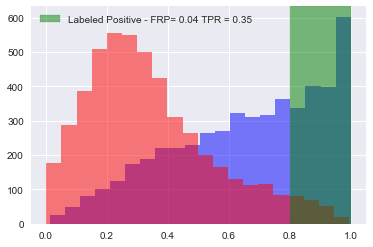

0.9


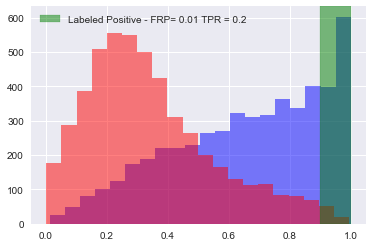

In [66]:
import seaborn
import matplotlib.pyplot as plt

for i in range(0,10):
    threshold = float(i)/10
    print (threshold)
    fig, ax = plt.subplots()
    df_X[df_X['outcome']==1]['score'].hist(bins=20,color='b',alpha=0.5)
    df_X[df_X['outcome']==0]['score'].hist(bins=20,color='r',alpha=0.5)
    fpr = np.round(len(df_X[(df_X['outcome']==0) & (df_X['score']>threshold)])/len(df_X[df_X['outcome']==0]),2)
    tpr = np.round(len(df_X[(df_X['outcome']==1) & (df_X['score']>threshold)])/len(df_X[df_X['outcome']==1]),2)
    ax.axvspan(threshold, 1, alpha=0.5, color='g',label='Labeled Positive - FRP= ' + str(fpr)+' TPR = ' + str(tpr))
    plt.legend()
    plt.savefig
    plt.show()



In [25]:
df_X[df_X['outcome']==1]

,0,1,2,3,4,5,6,7,8,9,outcome
0,-0.529967,1.709674,1.863403,-0.058683,1.966341,-1.145167,0.021513,-2.520949,-0.974623,1.319153,1
1,1.142805,3.746207,-3.316927,-1.196412,2.110392,-2.231153,0.023782,-0.129877,-3.090131,-0.927126,1
3,-0.111820,0.388380,2.432575,0.307387,-0.330617,-0.672257,-1.322169,0.080431,1.575016,3.075850,1
5,0.916306,2.785592,-1.877442,1.645356,1.186210,-1.571161,0.892977,0.529440,-1.750729,0.476330,1
6,1.387671,4.556270,-6.754566,-0.729752,2.349310,-2.171812,2.362839,1.758798,-3.783418,-3.924490,1
10,-0.107369,3.079496,-3.300108,0.758076,1.512662,-0.895224,-0.580111,1.660496,-2.112990,-1.131698,1
11,0.203874,2.566154,-1.542051,-0.950500,1.194176,-0.161740,-0.272346,2.230119,-0.645330,0.012998,1
15,-1.849808,0.296125,2.769003,-0.649619,-0.674489,-0.773433,0.174959,0.062199,1.445455,4.146650,1
16,-0.642862,4.988758,-0.839552,0.477706,3.805866,-1.520538,1.358634,-0.662127,-3.143059,0.689498,1
17,-0.415680,1.439641,0.437532,-0.958906,0.297442,-2.142484,2.579835,-1.077005,-0.342734,2.006950,1


In [ ]:
df

In [13]:
len(df)

280